# Imports

In [1]:
import numpy as np

import plotly.graph_objects as go

from pymoo.indicators.hv import HV
from pymoo.indicators.igd_plus import IGDPlus
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

from Ellipsoid import Ellipsoid

from R_metric import R_Metric

from PHI import PHI

# Utils for plots

In [2]:
def plot_3d_pymoo(pf, ref_dir, fair_dir, res):
    plot = Scatter(legend=True)

    plot.add(
        pf,
        plot_type="surface",
        color="black",
        alpha=0.3
        )

    plot.add(np.vstack([np.zeros(3), ref_dir]), plot_type="line", color="orange", linewidth=2, label="Preference Line")
    plot.add(np.vstack([np.zeros(3), fair_dir]), plot_type="line", color="green", linewidth=2, label="Fairness Line")

    plot.add(res.F, color="red", s=5, label="Ellipsoid")

    return plot


def plot_3d_plotly(pf, ref_dir, fair_dir, res):
    fig = go.Figure()

    # Pareto front
    fig.add_trace(go.Scatter3d(
    x=pf[:,0], y=pf[:,1], z=pf[:,2],
    mode="markers",
    marker=dict(size=1, color="black"),
    name="Pareto front"
    ))

    # Preference line.
    fig.add_trace(go.Scatter3d(
        x=[0, ref_dir[0]], y=[0, ref_dir[1]], z=[0, ref_dir[2]],
        mode="lines", line=dict(color="orange", width=5),
        name="Preference Line"
    ))

    # Fairness line.
    fig.add_trace(go.Scatter3d(
        x=[0, fair_dir[0]], y=[0, fair_dir[1]], z=[0, fair_dir[2]],
        mode="lines", line=dict(color="green", width=5),
        name="Fairness Line"
    ))

    # Solutions.
    fig.add_trace(go.Scatter3d(
        x=res.F[:,0], y=res.F[:,1], z=res.F[:,2],
        mode="markers", marker=dict(color="red", size=3),
        name="Ellipsoid"
    ))

    # Axis titles.
    fig.update_layout(scene=dict(
    xaxis_title="f1",
    yaxis_title="f2",
    zaxis_title="f3"
    ))

    fig.show()

# Global settings

In [3]:
problem_name    = "dtlz1"
n_obj           = 3
ref_dir         = np.array([0.6, 0.3, 0.1])
fair_dir        = 1 / ref_dir
fair_dir        = fair_dir / np.linalg.norm(fair_dir)
pop_size        = 150
epsilon         = 1.2
alpha           = 0.1
n_gen           = 300
n_partitions    = 14

# Algorithm runs

## Ellipsoid w/o alpha softening

In [4]:
problem = get_problem(problem_name, n_obj=n_obj)

algorithm = Ellipsoid(
    w=ref_dir,
    pop_size=pop_size,
    epsilon=epsilon,
    alpha=alpha,
    adapt_alpha=True,
    soften_alpha=False
    )

res_nosoften = minimize(
    problem,
    algorithm,
    termination=("n_gen", n_gen),
    seed=0,
    verbose=True
)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      150 |    150 |  9.384092E+01 |  4.058496E+02
     2 |      300 |     21 |  9.384092E+01 |  2.482517E+02
     3 |      450 |     17 |  9.061248E+01 |  1.727603E+02
     4 |      600 |     17 |  7.954280E+01 |  1.527924E+02
     5 |      750 |     27 |  7.954280E+01 |  1.308079E+02
     6 |      900 |     26 |  5.115496E+01 |  1.079770E+02
     7 |     1050 |     22 |  4.252988E+01 |  9.320613E+01
     8 |     1200 |     20 |  3.399947E+01 |  7.508472E+01
     9 |     1350 |     18 |  3.399947E+01 |  5.639734E+01
    10 |     1500 |     15 |  3.107658E+01 |  4.650836E+01
    11 |     1650 |     17 |  2.120167E+01 |  4.167367E+01
    12 |     1800 |     12 |  1.453520E+01 |  3.273144E+01
    13 |     1950 |     13 |  1.080336E+01 |  2.989086E+01
    14 |     2100 |     13 |  1.080336E+01 |  3.025659E+01
    15 |     2250 |     12 |  1.080336E+01 |  2.822908E+01
    16 |     2400 |     12 |  1.080336E+01 |  2.619334E+

## Ellipsoid w/ alpha softening

In [5]:
problem = get_problem(problem_name, n_obj=n_obj)

algorithm = Ellipsoid(
    w=ref_dir,
    pop_size=pop_size,
    epsilon=epsilon,
    alpha=alpha,
    adapt_alpha=True,
    soften_alpha=True
    )

res_soften = minimize(
    problem,
    algorithm,
    termination=("n_gen", n_gen),
    seed=0,
    verbose=True
)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      150 |    150 |  9.384092E+01 |  4.058496E+02
     2 |      300 |     21 |  9.384092E+01 |  2.482517E+02
     3 |      450 |     17 |  9.061248E+01 |  1.727603E+02
     4 |      600 |     17 |  7.954280E+01 |  1.527924E+02
     5 |      750 |     27 |  7.954280E+01 |  1.308079E+02
     6 |      900 |     26 |  5.115496E+01 |  1.079770E+02
     7 |     1050 |     22 |  4.252988E+01 |  9.320613E+01
     8 |     1200 |     20 |  3.399947E+01 |  7.508472E+01
     9 |     1350 |     18 |  3.399947E+01 |  5.639734E+01
Alpha softened!
    10 |     1500 |     15 |  3.107658E+01 |  4.650836E+01
    11 |     1650 |     17 |  2.120167E+01 |  4.167367E+01
    12 |     1800 |     12 |  1.453520E+01 |  3.273144E+01
    13 |     1950 |     13 |  1.080336E+01 |  2.989086E+01
    14 |     2100 |     13 |  1.080336E+01 |  3.025659E+01
Alpha softened!
    15 |     2250 |     12 |  1.080336E+01 |  2.822908E+01
    16 |     2400 |     

# Graphic visualization

## PF approximation

In [6]:
ref_dirs = get_reference_directions(
    "das-dennis",
    n_obj,
    n_partitions=n_partitions
    )

pf = problem.pareto_front(ref_dirs)

## Ellipsoid w/o alpha softening

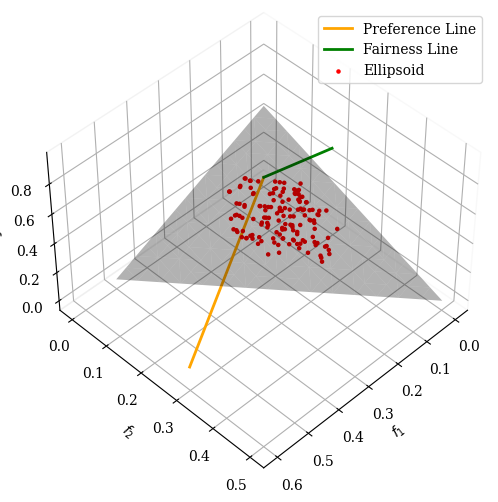

In [7]:
plot_3d_pymoo(pf, ref_dir, fair_dir, res_nosoften).show()

In [8]:
plot_3d_plotly(pf, ref_dir, fair_dir, res_nosoften)

## Ellipsoid w/ alpha softening

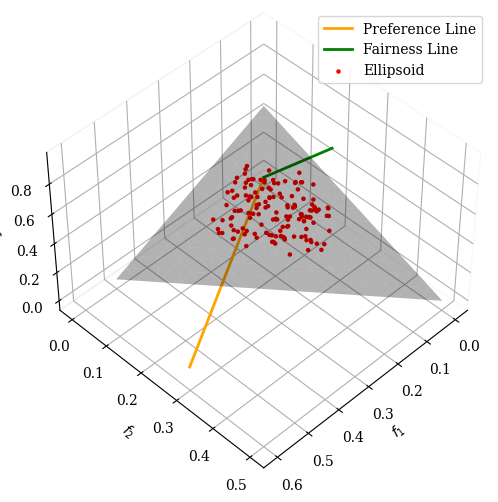

In [9]:
plot_3d_pymoo(pf, ref_dir, fair_dir, res_soften).show()

In [10]:
plot_3d_plotly(pf, ref_dir, fair_dir, res_soften)

# Performance metrics comparison

## IGD+

In [11]:
igdp = IGDPlus(pf)

print("IGD+ w/o soften: ", igdp(res_nosoften.F))
print("IGD+ soften: ", igdp(res_soften.F))

IGD+ w/o soften:  0.061151265091014755
IGD+ soften:  0.0563387180348472


## HV

In [12]:
hv = HV(ref_point=problem.nadir_point())

print("HV w/o soften: ", hv(res_nosoften.F))
print("HV soften: ", hv(res_soften.F))

HV w/o soften:  0.07057089392348842
HV soften:  0.07250466639020424


## R-metric

### Prepare transferred sets of solutions

In [13]:
z_r = fair_dir / 3
z_w = fair_dir * 3
w = fair_dir
extent = 0.2

R_nosoften = R_Metric(z_r=z_r, z_w=z_w, w=w, extent=extent)
R_soften = R_Metric(z_r=z_r, z_w=z_w, w=w, extent=extent)
R_PF = R_Metric(z_r=z_r, z_w=z_w, w=w, extent=extent)

S_transferred_nosoften = R_nosoften.compute(res_nosoften.F)
S_transferred_soften = R_soften.compute(res_soften.F)
PF_transferred = R_PF.compute(pf)

nadir_PF_transferred = np.max(PF_transferred, axis=0)

### R-IGD+

In [14]:
r_igdp_nosoften = IGDPlus(PF_transferred)
r_igdp_soften = IGDPlus(PF_transferred)

print("R-IGD+ w/o soften: ", r_igdp_nosoften(S_transferred_nosoften))
print("R-IGD+ soften: ", r_igdp_soften(S_transferred_soften))

R-IGD+ w/o soften:  0.08647337459234836
R-IGD+ soften:  0.049286952696299416


### R-HV

In [15]:
r_HV_nosoften = HV(ref_point=nadir_PF_transferred)
r_HV_soften = HV(ref_point=nadir_PF_transferred)

print("R-HV w/o soften: ", r_HV_nosoften.do(S_transferred_nosoften))
print("R-HV soften: ", r_HV_soften.do(S_transferred_soften))

R-HV w/o soften:  0.0004926509297896679
R-HV soften:  0.0012049748022687863


## PHI

In [16]:
phi = PHI(nadir=problem.nadir_point())
phi_nosoften = phi.get_phi(res_nosoften.F, RP=z_r)
phi_soften = phi.get_phi(res_soften.F, RP=z_r)

print("PHI w/o soften: ", phi_nosoften)
print("PHI soften: ", phi_soften)

PHI w/o soften:  0.981130231814843
PHI soften:  0.9935898387963746
